# Flowers classification using CNN.

In [1]:

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [2]:
!unzip flower.zip

Archive:  flower.zip
   creating: flower/flowers/
   creating: flower/flowers/daisy/
  inflating: flower/flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flower/flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flower/flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flower/flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flower/flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flower/flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flower/flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flower/flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flower/flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flower/flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flower/flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flower/flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flower/flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flower/flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flower/flow

<a id="section-two"></a>
# 2-Loading the data.

In [3]:
# Specifying the path to the dataset folder
flowers = "/content/flower/flowers"
images=[]
labels=[]

**Now we wil load, resize, and normalize images,  and  also we will extract corresponding labels of the images.**

In [4]:
# Iterate through the subfolders in the dataset folder
for subfolder in os.listdir(flowers):
    subfolder_path = os.path.join(flowers, subfolder)
    if os.path.isdir(subfolder_path):
        # Get the label from the subfolder name
        label = subfolder

        # Iterate through the image files in the subfolder
        for image_file in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, image_file)

            # Read the image using OpenCV
            image = cv2.imread(image_path)

            # Perform any necessary preprocessing on the image

            # Resize the image to a fixed size (e.g., 64x64)
            image = cv2.resize(image, (150, 150))

            # Normalize pixel values to the range of 0 to 1
            image = image.astype('float32') / 255.0

            # Append the image and label to the lists
            images.append(image)
            labels.append(label)

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)


<a id="section-three"></a>
# 3-Data visualization

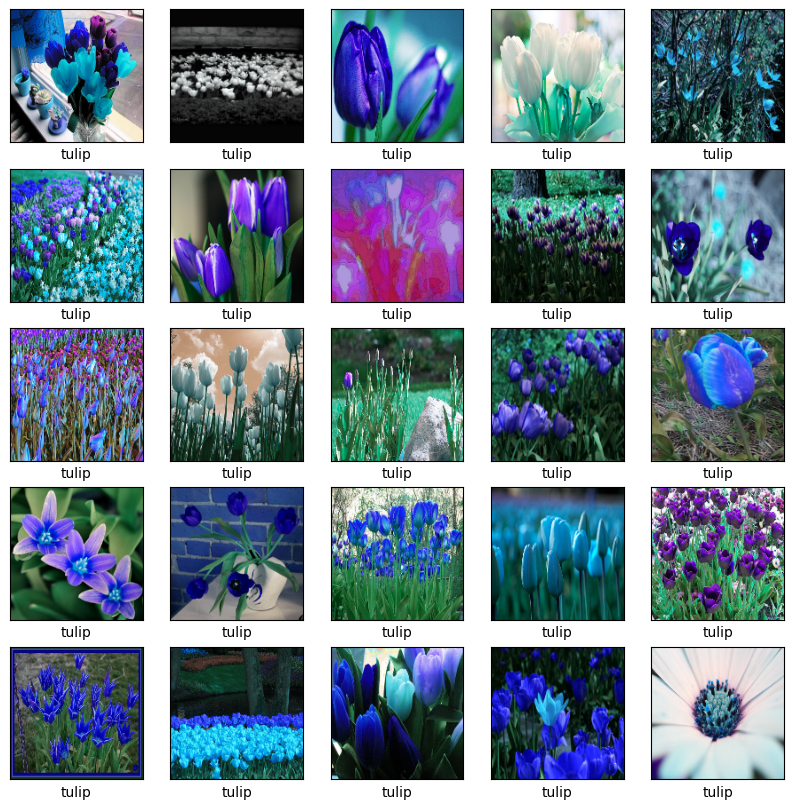

In [5]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(labels[i])
plt.show()

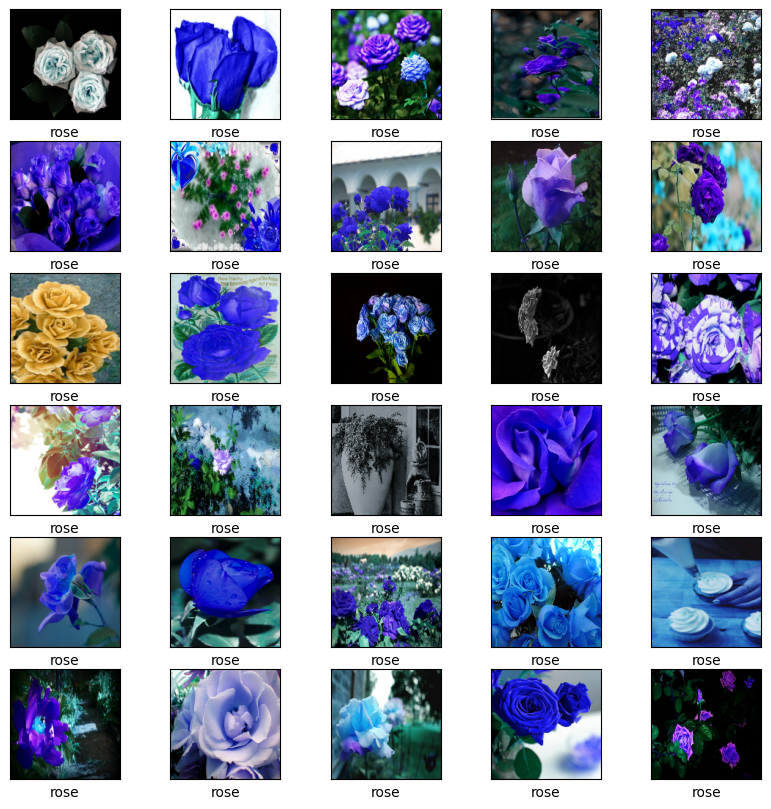

In [6]:
plt.figure(figsize=(10, 10))
for i in range(1001, 1031):
    plt.subplot(6, 5, i-1000)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(labels[i])
plt.show()

In [14]:
# Convert labels to integers
label_to_index = {label: i for i, label in enumerate(np.unique(labels))}
labels = np.array([label_to_index[label] for label in labels])

# Perform one-hot encoding on the labels
num_classes = len(np.unique(labels))
labels = to_categorical(labels, num_classes=num_classes)

In [15]:
print(images.shape)
print(labels.shape)

(1605, 150, 150, 3)
(1605, 5)


In [16]:
# Split the data into training and testing sets

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Print the shape of the arrays to verify the loading process
print("Train Images shape:", train_images.shape)
print("Train Labels shape:", train_labels.shape)
print("Test Images shape:", test_images.shape)
print("Test Labels shape:", test_labels.shape)

Train Images shape: (1284, 150, 150, 3)
Train Labels shape: (1284, 5)
Test Images shape: (321, 150, 150, 3)
Test Labels shape: (321, 5)


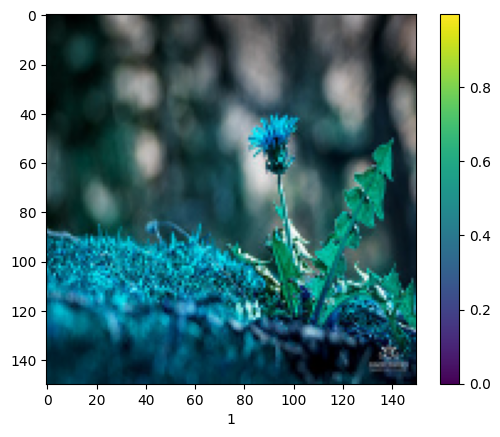

In [18]:
class_label = np.argmax(train_labels[101])
plt.imshow(train_images[101])
plt.xlabel(class_label)
plt.colorbar()

In [19]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

CNN :

In [20]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(150, 150,3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])

In [21]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [22]:
# Train the model
batch_size = 32
epochs = 20

history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=batch_size),
    steps_per_epoch=len(train_images) // batch_size,
    epochs=epochs,
    validation_data=(test_images, test_labels))

Epoch 1/20
40/40 [==============================] - 73s 2s/step - loss: 1.5063 - accuracy: 0.3522 - val_loss: 1.1848 - val_accuracy: 0.5140
Epoch 2/20
40/40 [==============================] - 73s 2s/step - loss: 1.1926 - accuracy: 0.4944 - val_loss: 1.1233 - val_accuracy: 0.5421
Epoch 3/20
40/40 [==============================] - 70s 2s/step - loss: 1.1387 - accuracy: 0.5232 - val_loss: 1.0003 - val_accuracy: 0.6137
Epoch 4/20
40/40 [==============================] - 64s 2s/step - loss: 1.0351 - accuracy: 0.5863 - val_loss: 1.0086 - val_accuracy: 0.6137
Epoch 5/20
40/40 [==============================] - 64s 2s/step - loss: 0.9644 - accuracy: 0.6126 - val_loss: 0.9651 - val_accuracy: 0.6231
Epoch 6/20
40/40 [==============================] - 65s 2s/step - loss: 0.9633 - accuracy: 0.6126 - val_loss: 0.9567 - val_accuracy: 0.6854
Epoch 7/20
40/40 [==============================] - 64s 2s/step - loss: 0.8692 - accuracy: 0.6653 - val_loss: 0.9022 - val_accuracy: 0.6729
Epoch 8/20
40/40 [==

11/11 [==============================] - 4s 326ms/step - loss: 0.8082 - accuracy: 0.7134
test_loss:, [0.8081797361373901, 0.7133956551551819]


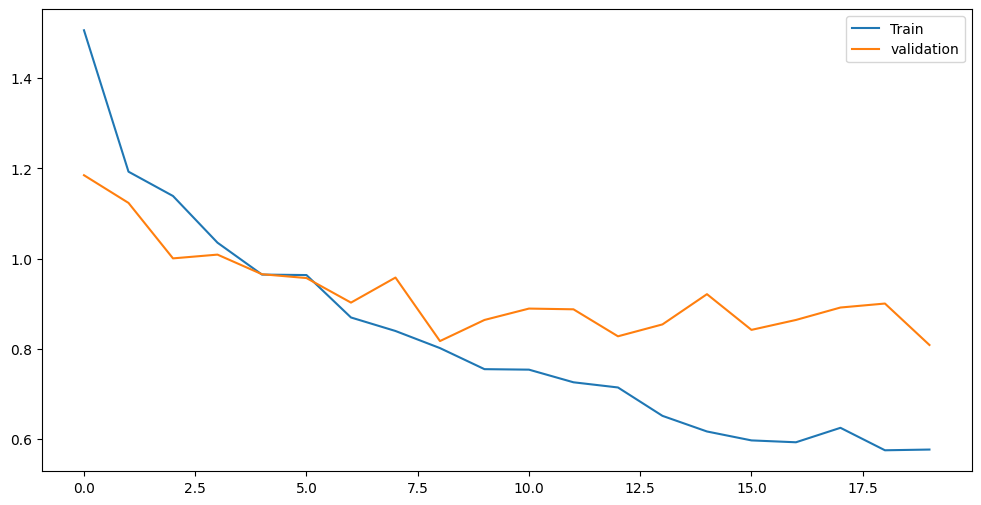

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["Train", "validation"], loc="upper right")

loss=model.evaluate(test_images, test_labels)
print(f"test_loss:, {loss}")


In [24]:
test_loss, test_acc= model.evaluate(test_images, test_labels, verbose=2)
print("\nTest loss=", test_loss)
print("\nTest accuracy=", test_acc)

11/11 - 3s - loss: 0.8082 - accuracy: 0.7134 - 3s/epoch - 304ms/step

Test loss= 0.8081797361373901

Test accuracy= 0.7133956551551819


we've got an accuracy of `71%`

In [25]:
predictions=model.predict(test_images)

11/11 [==============================] - 3s 305ms/step


In [26]:
test_labels[100]

array([0., 0., 0., 0., 1.], dtype=float32)

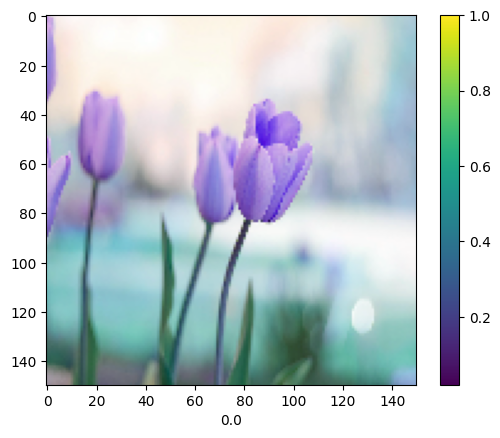

In [28]:
plt.imshow(test_images[100])
plt.xlabel(test_labels[100][0])
plt.colorbar()

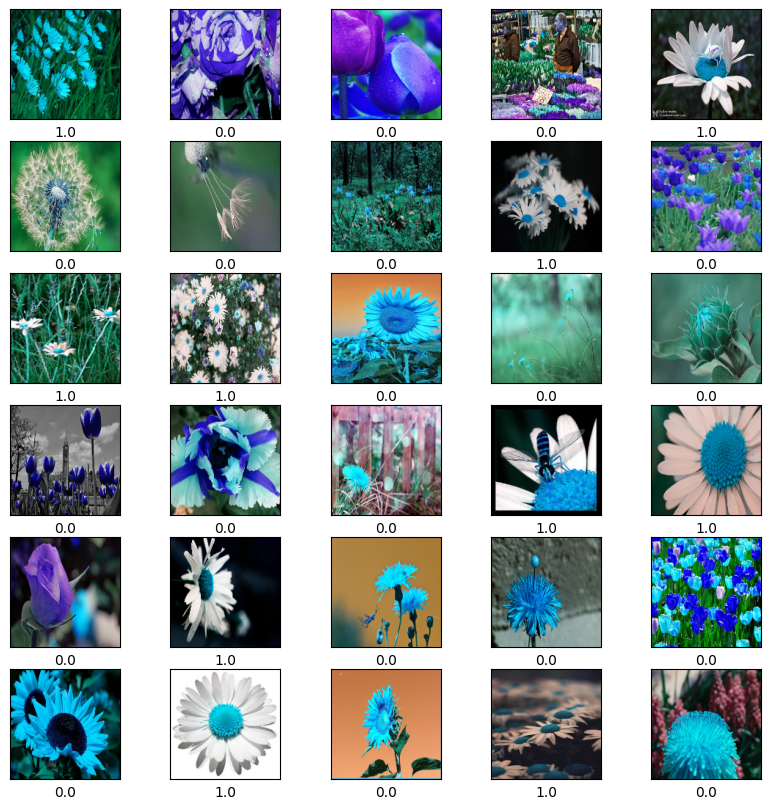

In [30]:
plt.figure(figsize=(10, 10))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(test_labels[i][0])
plt.show()

In [31]:
predictions[0]

array([4.8868521e-04, 4.7556165e-01, 3.7286129e-05, 4.6935469e-01,
       5.4557845e-02], dtype=float32)

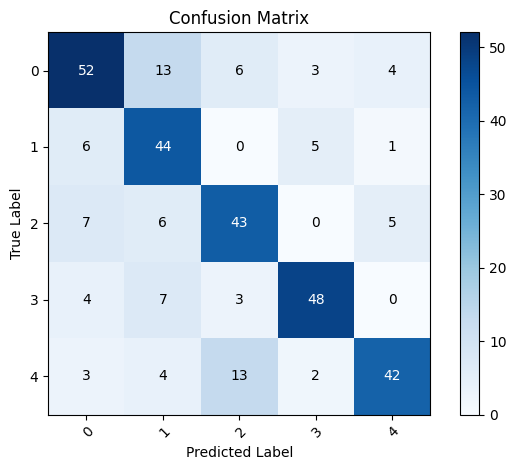

In [32]:
# Convert one-hot encoded labels to class indices
test_labels_indices = np.argmax(test_labels, axis=1)
predictions_indices = np.argmax(predictions, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(test_labels_indices, predictions_indices)

# Get class labels
classes = unique_labels(test_labels_indices, predictions_indices)

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Set axis labels
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True Label',
       xlabel='Predicted Label')

# Rotate and align the tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over the data and create text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2 else "black")

# Display the plot
plt.tight_layout()
plt.show()


**print images which were predicted `correctly`.**

In [33]:
import matplotlib.pyplot as plt

# Make predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Create lists to store the indices of images with the same and different labels
same_labels_indices = []
different_labels_indices = []

# Iterate through the predicted and true labels
for i in range(len(predicted_labels)):
    if predicted_labels[i] == true_labels[i]:
        same_labels_indices.append(i)
    else:
        different_labels_indices.append(i)


11/11 [==============================] - 4s 369ms/step


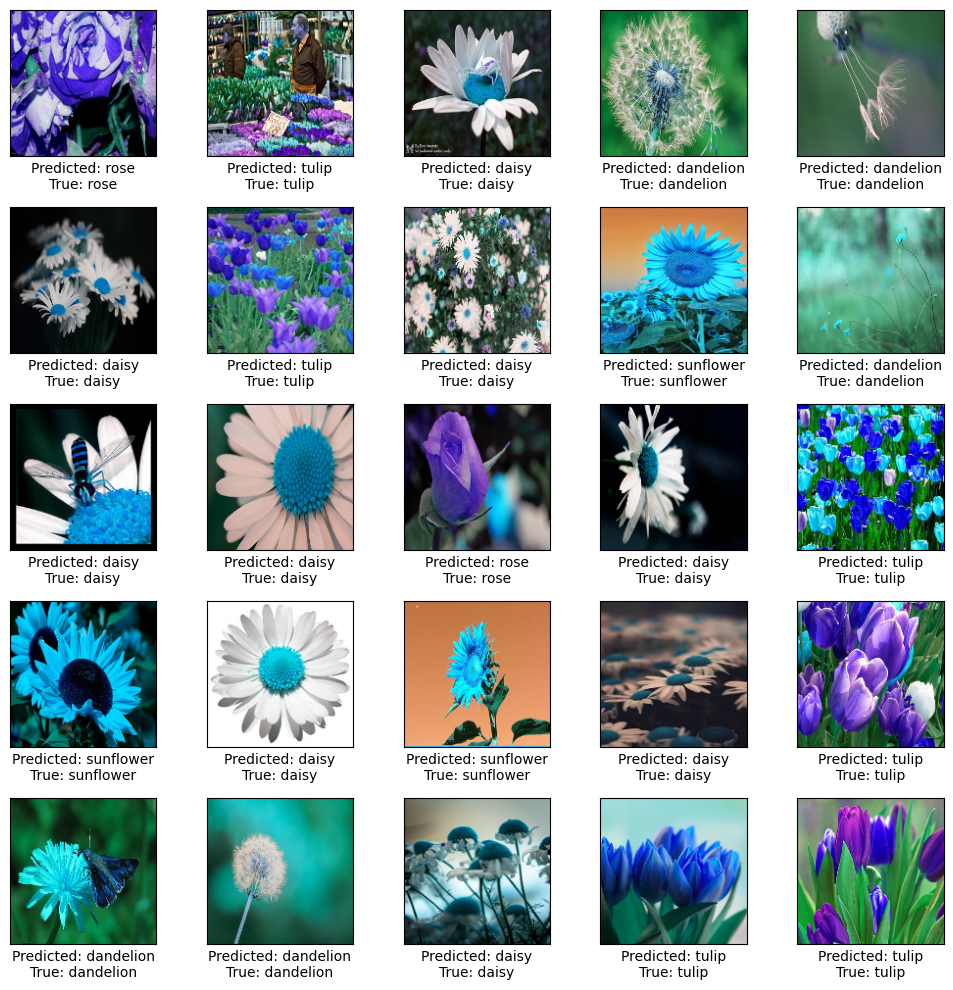

In [34]:
# Create a dictionary to map label indices to their corresponding names
index_to_label = {i: label for label, i in label_to_index.items()}

# Print images with the same predicted and true labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(test_images[same_labels_indices[i]], cmap=plt.cm.binary)
    predicted_label = index_to_label[predicted_labels[same_labels_indices[i]]]
    true_label = index_to_label[true_labels[same_labels_indices[i]]]
    plt.xlabel("Predicted: {}\nTrue: {}".format(predicted_label, true_label), wrap=True)
plt.tight_layout()
plt.show()
